In [1]:
#Análise da situação empregatícia dos finalistas do Fortec no município de Manaus
#Análise sobre as variáveis de maior influência na probabilidade de se conseguir um emprego na área de formação
#Estudar os atributos, suas características e possíveis correlações
#Visualizar os dados
#Criar um modelo de machine learning para prever as probabilidades de se conseguir um emprego na área de formação

In [2]:
#importando as bibliotecas
import pandas as pd
import seaborn as srn
import seaborn as sns
import statistics as sts
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,accuracy_score

In [3]:
#descrição de linhas e colunas
cet=pd.read_excel('Aval_cetam_f_v8.xlsx')
cet.shape

(175, 14)

In [7]:
#Distribuição estatistica por variavel com a MODA (Valor que mais se repete)
cet.describe().T

,count,unique,top,freq
Qual sua idade?,175,4,Acima de 30,72
Qual seu genero?,175,2,Feminino,121
Qual sua renda familiar?,175,6,Entre R$ 1.000 e R$ 2.000,77
Qual regiao da cidade voce mora?,175,6,Norte,79
Qual a sua escola?,175,3,Saavedra,142
Qual o percentual da sua formacao no CETAM ja foi concluida?,175,1,Acima de 75% (Finalista),175
Qual tipo do seu curso?,175,2,Cursos Tecnicos,146
Qual o eixo tecnologico?,175,7,Ambiente e saude,140
Qual o seu curso?,175,16,Radiologia,45
Qual sua formacao regular?,175,3,Ensino Medio Completo,136


Text(0, 0.5, '')

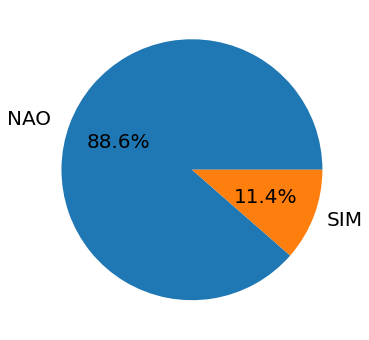

In [19]:
cet['Esta exercendo atividade remunerada na area de formacao do curso?'].value_counts().plot.pie(fontsize=20,autopct='%1.1f%%',
                                                                                                 figsize=(8,6
                                                                                                        )).set_ylabel('')

<AxesSubplot:ylabel='Qual seu genero?'>

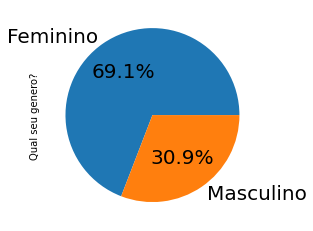

In [21]:
cet['Qual seu genero?'].value_counts().plot.pie(fontsize=20,autopct='%1.1f%%')

Text(0, 0.5, '')

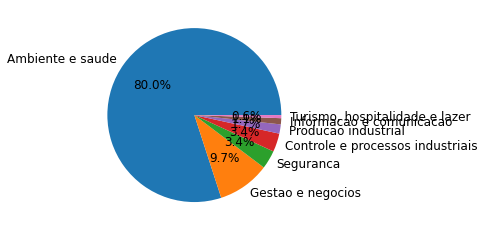

In [23]:
cet['Qual o eixo tecnologico?'].value_counts().plot.pie(fontsize=12,autopct='%1.1f%%',
                                                            figsize=(6,4)).set_ylabel('')

In [87]:
cet.groupby('Qual a sua escola?')[u'Esta exercendo atividade remunerada na area de formacao do curso?'].value_counts()

Qual a sua escola?     Esta exercendo atividade remunerada na area de formacao do curso?
IBC Benjamin Constant  NAO                                                                    8
                       SIM                                                                    1
Padre Estelio Dalison  NAO                                                                   22
                       SIM                                                                    2
Saavedra               NAO                                                                  125
                       SIM                                                                   17
Name: Esta exercendo atividade remunerada na area de formacao do curso?, dtype: int64

<AxesSubplot:ylabel='Qual a sua escola?'>

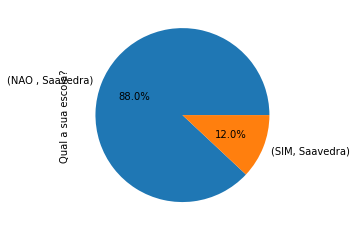

In [84]:
df2 = cet[cet['Qual a sua escola?']=='Saavedra']
df2.groupby(u'Esta exercendo atividade remunerada na area de formacao do curso?')['Qual a sua escola?'].value_counts().plot.pie(autopct='%1.1f%%')

<AxesSubplot:ylabel='Qual a sua escola?'>

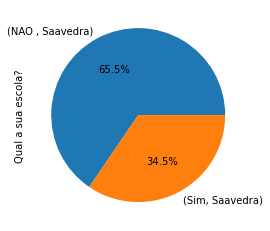

In [89]:
df2 = cet[cet['Qual a sua escola?']=='Saavedra']
df2.groupby(u'Possui experiencia na area de formacao do curso?')['Qual a sua escola?'].value_counts().plot.pie(autopct='%1.1f%%')

<AxesSubplot:ylabel='Qual a sua escola?'>

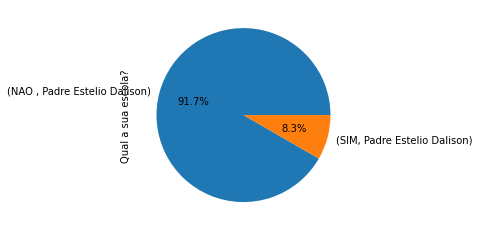

In [86]:
df4 = cet[cet['Qual a sua escola?']=='Padre Estelio Dalison']
df4.groupby(u'Esta exercendo atividade remunerada na area de formacao do curso?')['Qual a sua escola?'].value_counts().plot.pie(autopct='%1.1f%%')

<AxesSubplot:ylabel='Qual a sua escola?'>

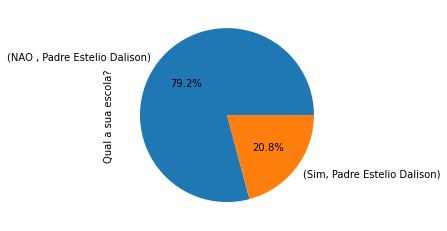

In [90]:
df4 = cet[cet['Qual a sua escola?']=='Padre Estelio Dalison']
df4.groupby(u'Possui experiencia na area de formacao do curso?')['Qual a sua escola?'].value_counts().plot.pie(autopct='%1.1f%%')

<AxesSubplot:ylabel='Qual a sua escola?'>

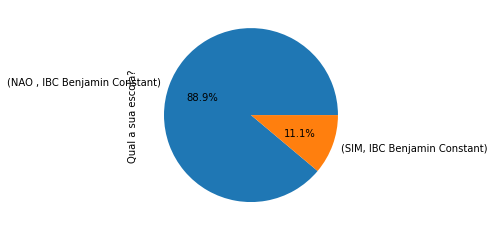

In [88]:
df3 = cet[cet['Qual a sua escola?']=='IBC Benjamin Constant']
df3.groupby(u'Esta exercendo atividade remunerada na area de formacao do curso?')['Qual a sua escola?'].value_counts().plot.pie(autopct='%1.1f%%')

<AxesSubplot:ylabel='Qual a sua escola?'>

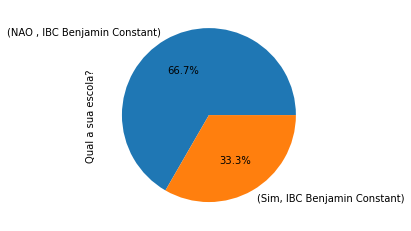

In [127]:
df3 = cet[cet['Qual a sua escola?']=='IBC Benjamin Constant']
df3.groupby(u'Possui experiencia na area de formacao do curso?')['Qual a sua escola?'].value_counts().plot.pie(autopct='%1.1f%%')

<AxesSubplot:ylabel='Esta exercendo atividade remunerada na area de formacao do curso?'>

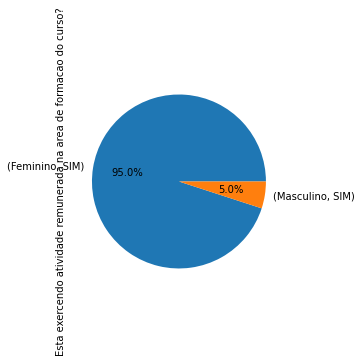

In [128]:
gnf = cet[cet['Esta exercendo atividade remunerada na area de formacao do curso?']=='SIM']
gnf.groupby(u'Qual seu genero?')['Esta exercendo atividade remunerada na area de formacao do curso?'].value_counts().plot.pie(autopct='%1.1f%%')

<AxesSubplot:ylabel='Esta exercendo atividade remunerada na area de formacao do curso?'>

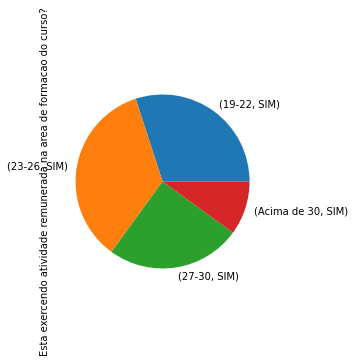

In [22]:
gnf1 = cet[cet['Esta exercendo atividade remunerada na area de formacao do curso?']=='SIM']
gnf1.groupby(u'Qual sua idade?')['Esta exercendo atividade remunerada na area de formacao do curso?'].value_counts().plot.pie()

<AxesSubplot:ylabel='Esta exercendo atividade remunerada na area de formacao do curso?'>

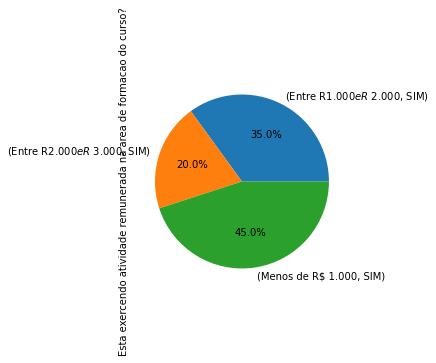

In [131]:
gnf2 = cet[cet['Esta exercendo atividade remunerada na area de formacao do curso?']=='SIM']
gnf2.groupby(u'Qual sua renda familiar?')['Esta exercendo atividade remunerada na area de formacao do curso?'].value_counts().plot.pie(autopct='%1.1f%%')

<AxesSubplot:ylabel='Esta exercendo atividade remunerada na area de formacao do curso?'>

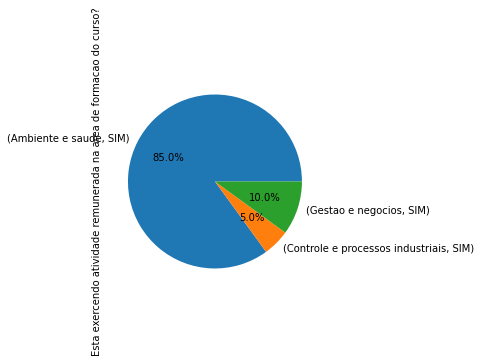

In [133]:
gnf3 = cet[cet['Esta exercendo atividade remunerada na area de formacao do curso?']=='SIM']
gnf3.groupby(u'Qual o eixo tecnologico?')['Esta exercendo atividade remunerada na area de formacao do curso?'].value_counts().plot.pie(autopct='%1.1f%%')

<AxesSubplot:ylabel='Esta exercendo atividade remunerada na area de formacao do curso?'>

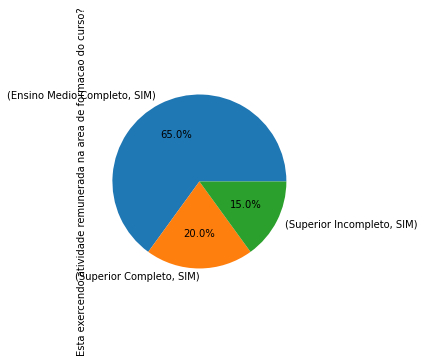

In [134]:
gnf4 = cet[cet['Esta exercendo atividade remunerada na area de formacao do curso?']=='SIM']
gnf4.groupby(u'Qual sua formacao regular?')['Esta exercendo atividade remunerada na area de formacao do curso?'].value_counts().plot.pie(autopct='%1.1f%%')

<AxesSubplot:ylabel='Esta exercendo atividade remunerada na area de formacao do curso?'>

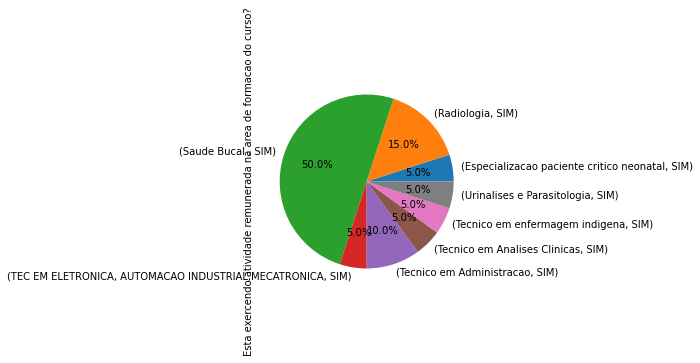

In [136]:
gnf5 = cet[cet['Esta exercendo atividade remunerada na area de formacao do curso?']=='SIM']
gnf5.groupby(u'Qual o seu curso?')['Esta exercendo atividade remunerada na area de formacao do curso?'].value_counts().plot.pie(autopct='%1.1f%%')

In [155]:
cet.pivot_table('Qual o seu curso?',["Qual seu genero?"],'Qual sua idade?',aggfunc='count')

Qual sua idade?,19-22,23-26,27-30,Acima de 30
Qual seu genero?,,,,
Feminino,32,29,18,42
Masculino,8,11,5,30


<AxesSubplot:ylabel='Qual sua idade?'>

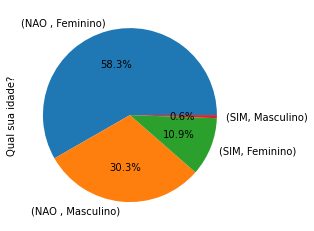

In [174]:
cet.groupby(['Esta exercendo atividade remunerada na area de formacao do curso?','Qual seu genero?']).count()['Qual sua idade?'].plot.pie(autopct='%1.1f%%')

<AxesSubplot:ylabel='Qual sua idade?'>

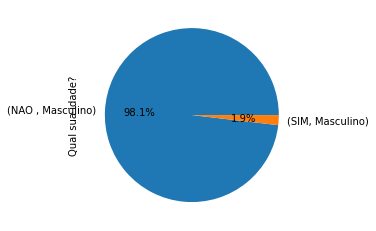

In [199]:
gnf5 = cet[cet['Qual seu genero?']=='Masculino']
gnf5.groupby(['Esta exercendo atividade remunerada na area de formacao do curso?','Qual seu genero?']).count()['Qual sua idade?'].plot.pie(autopct='%1.1f%%')

<AxesSubplot:ylabel='Qual sua idade?'>

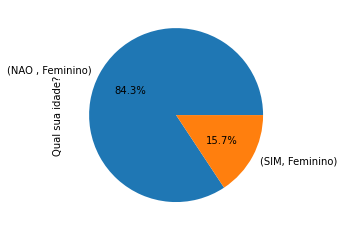

In [202]:
gnf5 = cet[cet['Qual seu genero?']=='Feminino']
gnf5.groupby(['Esta exercendo atividade remunerada na area de formacao do curso?','Qual seu genero?']).count()['Qual sua idade?'].plot.pie(autopct='%1.1f%%')

<AxesSubplot:ylabel='Qual sua idade?'>

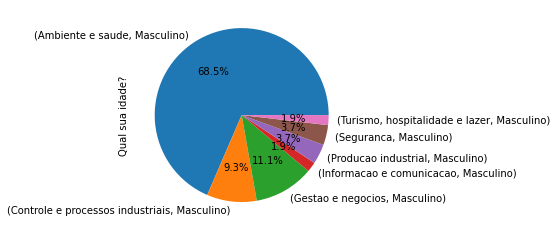

In [203]:
gnf5 = cet[cet['Qual seu genero?']=='Masculino']
gnf5.groupby(['Qual o eixo tecnologico?','Qual seu genero?']).count()['Qual sua idade?'].plot.pie(autopct='%1.1f%%')

<AxesSubplot:ylabel='Qual sua idade?'>

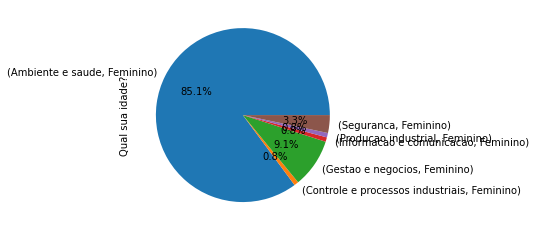

In [208]:
gnf5 = cet[cet['Qual seu genero?']=='Feminino']
gnf5.groupby(['Qual o eixo tecnologico?','Qual seu genero?']).count()['Qual sua idade?'].plot.pie(autopct='%1.1f%%')

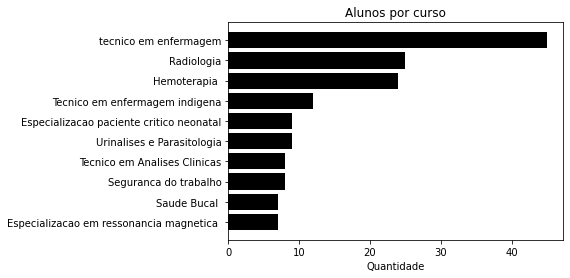

In [14]:
fig, ax = plt.subplots()

y_pos = np.arange(len(cet['Qual o seu curso?'].value_counts()[:10]))
values = cet['Qual o seu curso?'].value_counts()[:10]
segmentos = cet['Qual o seu curso?'].unique()[:10]

ax.barh(y_pos, values, align='center', color='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(segmentos)
ax.invert_yaxis()
ax.set_xlabel('Quantidade')
ax.set_title('Alunos por curso')

plt.show()

In [10]:
cet.dtypes

Qual sua idade?                                                      object
Qual seu genero?                                                     object
Qual sua renda familiar?                                             object
Qual regiao da cidade voce mora?                                     object
Qual a sua escola?                                                   object
Qual o percentual da sua formacao no CETAM ja foi concluida?         object
Qual tipo do seu curso?                                              object
Qual o eixo tecnologico?                                             object
Qual o seu curso?                                                    object
Qual sua formacao regular?                                           object
Qual sua disponibilidade de horario para atividade remunerada?       object
Qual sua carga horaria disponivel?                                   object
Possui experiencia na area de formacao do curso?                     object
Esta exercen

In [11]:
cet.head()

,Qual sua idade?,Qual seu genero?,Qual sua renda familiar?,Qual regiao da cidade voce mora?,Qual a sua escola?,Qual o percentual da sua formacao no CETAM ja foi concluida?,Qual tipo do seu curso?,Qual o eixo tecnologico?,Qual o seu curso?,Qual sua formacao regular?,Qual sua disponibilidade de horario para atividade remunerada?,Qual sua carga horaria disponivel?,Possui experiencia na area de formacao do curso?,Esta exercendo atividade remunerada na area de formacao do curso?
0,19-22,Feminino,Entre R$ 1.000 e R$ 2.000,Norte,Saavedra,Acima de 75% (Finalista),Cursos Tecnicos,Ambiente e saude,tecnico em enfermagem,Ensino Medio Completo,Manha,4h,NAO,NAO
1,Acima de 30,Masculino,Menos de R$ 1.000,Norte,Saavedra,Acima de 75% (Finalista),Cursos Tecnicos,Ambiente e saude,Radiologia,Ensino Medio Completo,Tarde,6h,NAO,NAO
2,23-26,Feminino,Menos de R$ 1.000,Norte,Saavedra,Acima de 75% (Finalista),Cursos Tecnicos,Ambiente e saude,Radiologia,Ensino Medio Completo,Integral,8h,NAO,NAO
3,19-22,Masculino,Entre R$ 1.000 e R$ 2.000,Norte,Saavedra,Acima de 75% (Finalista),Cursos Tecnicos,Ambiente e saude,Radiologia,Ensino Medio Completo,Tarde,6h,NAO,NAO
4,Acima de 30,Feminino,Menos de R$ 1.000,Leste,Saavedra,Acima de 75% (Finalista),Cursos Tecnicos,Ambiente e saude,Hemoterapia,Superior Incompleto,Manha,6h,NAO,NAO


In [12]:
#dados foram previamente tratados
cet.count()

Qual sua idade?                                                      175
Qual seu genero?                                                     175
Qual sua renda familiar?                                             175
Qual regiao da cidade voce mora?                                     175
Qual a sua escola?                                                   175
Qual o percentual da sua formacao no CETAM ja foi concluida?         175
Qual tipo do seu curso?                                              175
Qual o eixo tecnologico?                                             175
Qual o seu curso?                                                    175
Qual sua formacao regular?                                           175
Qual sua disponibilidade de horario para atividade remunerada?       175
Qual sua carga horaria disponivel?                                   175
Possui experiencia na area de formacao do curso?                     175
Esta exercendo atividade remunerada na area de form

In [4]:
cet.head()

,Qual sua idade?,Qual seu genero?,Qual sua renda familiar?,Qual regiao da cidade voce mora?,Qual a sua escola?,Qual o percentual da sua formacao no CETAM ja foi concluida?,Qual tipo do seu curso?,Qual o eixo tecnologico?,Qual o seu curso?,Qual sua formacao regular?,Qual sua disponibilidade de horario para atividade remunerada?,Qual sua carga horaria disponivel?,Possui experiencia na area de formacao do curso?,Esta exercendo atividade remunerada na area de formacao do curso?
0,19-22,Feminino,Entre R$ 1.000 e R$ 2.000,Norte,Saavedra,Acima de 75% (Finalista),Cursos Tecnicos,Ambiente e saude,tecnico em enfermagem,Ensino Medio Completo,Manha,4h,NAO,NAO
1,Acima de 30,Masculino,Menos de R$ 1.000,Norte,Saavedra,Acima de 75% (Finalista),Cursos Tecnicos,Ambiente e saude,Radiologia,Ensino Medio Completo,Tarde,6h,NAO,NAO
2,23-26,Feminino,Menos de R$ 1.000,Norte,Saavedra,Acima de 75% (Finalista),Cursos Tecnicos,Ambiente e saude,Radiologia,Ensino Medio Completo,Integral,8h,NAO,NAO
3,19-22,Masculino,Entre R$ 1.000 e R$ 2.000,Norte,Saavedra,Acima de 75% (Finalista),Cursos Tecnicos,Ambiente e saude,Radiologia,Ensino Medio Completo,Tarde,6h,NAO,NAO
4,Acima de 30,Feminino,Menos de R$ 1.000,Leste,Saavedra,Acima de 75% (Finalista),Cursos Tecnicos,Ambiente e saude,Hemoterapia,Superior Incompleto,Manha,6h,NAO,NAO


Text(0, 0.5, '')

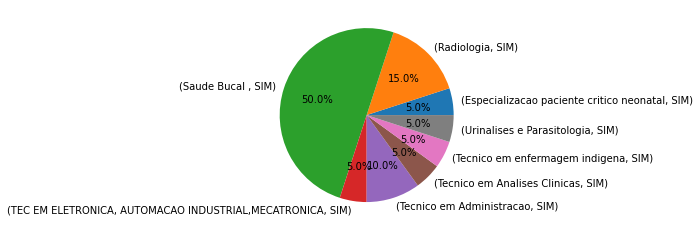

In [22]:
#grafico de pizza para visualização percentual
df2 = cet[cet['Esta exercendo atividade remunerada na area de formacao do curso?']=='SIM']
df2.groupby(u'Qual o seu curso?')['Esta exercendo atividade remunerada na area de formacao do curso?'].value_counts().plot.pie(fontsize=10,autopct='%1.1f%%',
                                                                                                 figsize=(6,4
                                                                                                        )).set_ylabel('')

In [24]:
df2 = cet[cet['Esta exercendo atividade remunerada na area de formacao do curso?']=='SIM']
df2.groupby(u'Qual o seu curso?')['Esta exercendo atividade remunerada na area de formacao do curso?'].value_counts()

Qual o seu curso?                                    Esta exercendo atividade remunerada na area de formacao do curso?
Especializacao paciente critico neonatal             SIM                                                                   1
Radiologia                                           SIM                                                                   3
Saude Bucal                                          SIM                                                                  10
TEC EM ELETRONICA, AUTOMACAO INDUSTRIAL,MECATRONICA  SIM                                                                   1
Tecnico em Administracao                             SIM                                                                   2
Tecnico em Analises Clinicas                         SIM                                                                   1
Tecnico em enfermagem indigena                       SIM                                                                   1
Urinal

Text(0, 0.5, '')

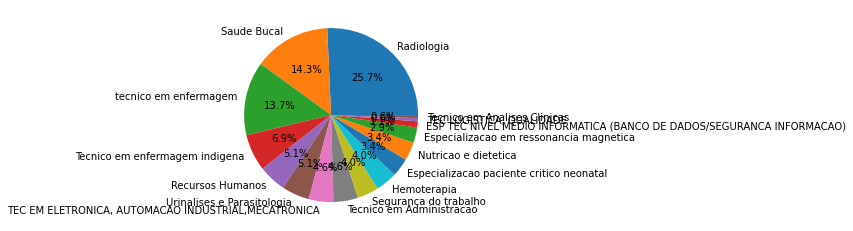

In [26]:
x2=cet['Qual o seu curso?'].value_counts().plot.pie(fontsize=10,autopct='%1.1f%%',
                                                                                                 figsize=(6,4
                                                                                                        )).set_ylabel('')
x2

Text(0, 0.5, '')

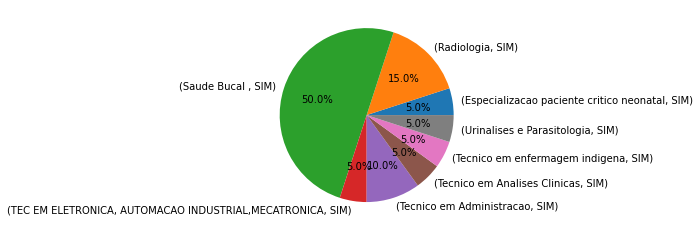

In [27]:
#grafico de pizza para visualização percentual
df2 = cet[cet['Esta exercendo atividade remunerada na area de formacao do curso?']=='SIM']
df2.groupby(u'Qual o seu curso?')['Esta exercendo atividade remunerada na area de formacao do curso?'].value_counts().plot.pie(fontsize=10,autopct='%1.1f%%',
                                                                                                 figsize=(6,4
                                                                                                        )).set_ylabel('')

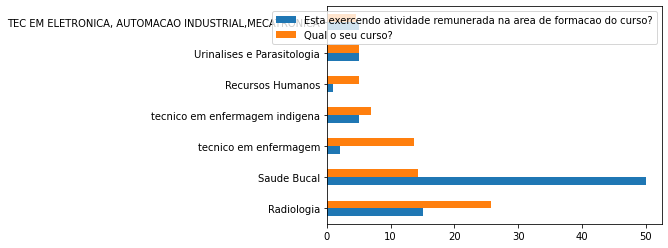

In [45]:
atividaderemunerada = [15,50,2,5,1,5,5]

curso = [25.7,14.3,13.7,6.9,5.1,5.1,4.6]

index = ['Radiologia', 'Saude Bucal', 'tecnico em enfermagem',
         'tecnico em enfermagem indigena', 'Recursos Humanos', 'Urinalises e Parasitologia', 'TEC EM ELETRONICA, AUTOMACAO INDUSTRIAL,MECATRONICA']

df = pd.DataFrame({'Esta exercendo atividade remunerada na area de formacao do curso?': atividaderemunerada,
                   'Qual o seu curso?': curso},index=index)

ax = df.plot.barh()

In [35]:
x2=cet['Qual o seu curso?'].value_counts()
x2

Radiologia                                                               45
Saude Bucal                                                              25
tecnico em enfermagem                                                    24
Tecnico em enfermagem indigena                                           12
Recursos Humanos                                                          9
Urinalises e Parasitologia                                                9
TEC EM ELETRONICA, AUTOMACAO INDUSTRIAL,MECATRONICA                       8
Tecnico em Administracao                                                  8
Seguranca do trabalho                                                     7
Hemoterapia                                                               7
Especializacao paciente critico neonatal                                  6
Nutricao e dietetica                                                      6
Especializacao em ressonancia magnetica                                   5
ESP TEC NIVE

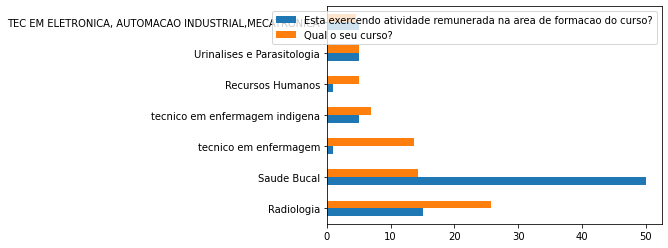

In [52]:
atividaderemunerada = [15,50,1,5,1,5,5]
curso = [25.7,14.3,13.7,6.9,5.1,5.1,4.6]
index = ['Radiologia', 'Saude Bucal', 'tecnico em enfermagem',
         'tecnico em enfermagem indigena', 'Recursos Humanos', 'Urinalises e Parasitologia', 'TEC EM ELETRONICA, AUTOMACAO INDUSTRIAL,MECATRONICA']
df = pd.DataFrame({'Esta exercendo atividade remunerada na area de formacao do curso?': atividaderemunerada,
                   'Qual o seu curso?': curso},index=index)
ax = df.plot.barh()

Text(0, 0.5, '')

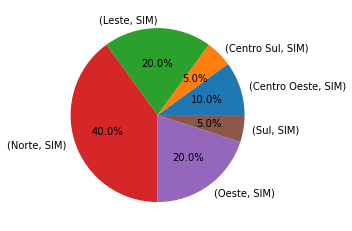

In [53]:
#grafico de pizza para visualização percentual
df2 = cet[cet['Esta exercendo atividade remunerada na area de formacao do curso?']=='SIM']
df2.groupby(u'Qual regiao da cidade voce mora?')['Esta exercendo atividade remunerada na area de formacao do curso?'].value_counts().plot.pie(fontsize=10,autopct='%1.1f%%',
                                                                                                 figsize=(6,4
                                                                                                        )).set_ylabel('')

Text(0, 0.5, '')

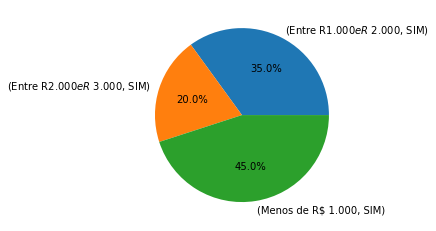

In [54]:
#grafico de pizza para visualização percentual
df2 = cet[cet['Esta exercendo atividade remunerada na area de formacao do curso?']=='SIM']
df2.groupby(u'Qual sua renda familiar?')['Esta exercendo atividade remunerada na area de formacao do curso?'].value_counts().plot.pie(fontsize=10,autopct='%1.1f%%',
                                                                                                 figsize=(6,4
                                                                                                        )).set_ylabel('')

Text(0, 0.5, '')

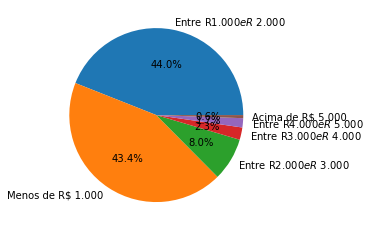

In [57]:
x2=cet['Qual sua renda familiar?'].value_counts().plot.pie(fontsize=10,autopct='%1.1f%%',
                                                                                                 figsize=(6,4
                                                                                                        )).set_ylabel('')
x2